<a href="https://colab.research.google.com/github/mchsidiq12/H8_06/blob/main/PYTN_KampusMerdeka_fp4_Adrian_Dwi_Adinata_Mohammad_Sidik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Belajar Mengembangkan Model Database dengan Python untuk Menjadi Analis Database / Final Projects 4 (Clustering)**

**Objektif**

Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:
- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan

# **A. Perkenalan**


Project ini membahas tentang pengembangan segmentasi pelanggan untuk menentukan strategi pemasaran. Sampel Dataset merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. File berada pada level pelanggan dengan 18 variabel perilaku.

- Algoritma model clustering yang digunakan adalah K-Means Clustering.

Attribute Information:
1. CUSTID : Identifikasi Pemegang Kartu Kredit (Kategoris)
2. BALANCE : Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian
3. BALANCEFREQUENCY : Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
4. PURCHASES : Jumlah pembelian yang dilakukan dari akun
5. ONEOFFPURCHASES : Jumlah pembelian maksimum dilakukan dalam sekali jalan
6. INSTALLMENTSPURCHASES : Jumlah pembelian dilakukan secara angsuran
7. CASHADVANCE : Uang tunai di muka yang diberikan oleh pengguna
8. PURCHASESFREQUENCY : Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
9. ONEOFFPURCHASESFREQUENCY : Seberapa sering Pembelian terjadi dalam sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli)
10. PURCHASESINSTALLMENTSFREQUENCY : Seberapa sering pembelian secara mencicil dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)
11. CASHADVANCEFREQUENCY : Seberapa sering uang tunai di muka dibayarkan
12. CASHADVANCETRX : Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"
13. PURCHASESTRX : Jumlah transaksi pembelian yang dilakukan
14. CREDITLIMIT : Batas Kartu Kredit untuk pengguna
15. PAYMENTS : Jumlah Pembayaran yang dilakukan oleh pengguna
16. MINIMUM_PAYMENTS : Jumlah minimum pembayaran yang dilakukan oleh pengguna
17. PRCFULLPAYMENT : Persentase pembayaran penuh yang dibayarkan oleh pengguna
18. TENURE : Jangka waktu layanan kartu kredit untuk pengguna

# **B. Import Pustaka Yang Dibutuhkan**

Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.


Pertama, library yang dibutuhkan di-import.
Bagian ini berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
from google.colab import drive #untuk mengakses drive
from dataclasses import dataclass
import pandas as pd #untuk manipulasi data
import numpy as np #untuk komputasi numerik
import matplotlib.pyplot as plt #untuk visualisasi
import seaborn as sns #untuk visualisasi
import plotly.express as px #untuk visualiasi
import scipy


from sklearn.preprocessing import StandardScaler #untuk standarisasi data
from sklearn.cluster import KMeans #untuk menggunakan algoritma KMeans Clustering
# untuk mendapatkan silhouette score
from sklearn import datasets 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer #untuk memvisualisasikan silhouette score

# **C. Data Loading**

Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan eksplorasi data secara sederhana.

Mengakses Google Drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


Mengambil dataset dan menyimpan kedalam variabel df, kemudian mencetak 5 data paling atas dan 5 data paling bawah

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CC GENERAL.csv')
display(df)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Menampilkan 3 contoh data secara acak

In [4]:
df.sample(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3512,C13612,1225.201454,1.000000,1842.64,1842.64,0.00,0.000000,0.583333,0.583333,0.000000,0.000000,0,8,1200.0,2326.846060,996.543357,0.0,12
6170,C16341,4183.825982,1.000000,490.61,45.65,444.96,178.950075,0.666667,0.083333,0.666667,0.333333,4,13,4500.0,1541.998312,2410.083966,0.0,12
7859,C18072,328.943655,0.714286,0.00,0.00,0.00,746.311927,0.000000,0.000000,0.000000,0.285714,2,0,1500.0,498.286059,103.323766,0.0,7


Menampilkan informasi detail tentang dataframe.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Menampilkan deskriptif statistik data

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Mengetahui dimensi dari dataframe atau ukuran baris dan kolomnya.

In [7]:
print('Jumlah Baris:', df.shape[0])
print('Jumlah Kolom:', df.shape[1])

Jumlah Baris: 8950
Jumlah Kolom: 18


Menampilkan nilai unik dari setiap kolom pada dataframe.

In [8]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

Mengecek tipe data untuk tiap kolom di dataframe

In [9]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

Menampilkan nama-nama kolom pada dataframe

In [10]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

# **D. Data Cleaning**

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa pengisian missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.


Menampilkan jumlah missing value

In [11]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Dapat dilihat bahwa terdapat nilai yang hilang pada data ada pada variabel CREDIT_LIMIT sebanyak 1 dan MINIMUM_PAYMENTS sebanyak 313.

Menghapus Kolom CUST_ID karena tidak diperlukan lagi

In [12]:
df.drop('CUST_ID', axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Mengisi missing values menggunakan median

In [14]:
df["CREDIT_LIMIT"].fillna(value=df["CREDIT_LIMIT"].median(), inplace=True)
df["MINIMUM_PAYMENTS"].fillna(value=df["MINIMUM_PAYMENTS"].median(), inplace=True)

Menampilkan jumlah missing value

In [15]:
df.isnull().sum().sum()

0

Memeriksa apakah terdapat duplikasi dalam data

In [16]:
df.duplicated().sum()

0

Berdasarkan keterangan diatas, terlihat bahwa sduah tidak ada missing values atau data yang hilang dalam kumpulan data. Serta tidak terdapat duplikasi pada keseluruhan data.

# **E. Explorasi Data**

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

Memeriksa Korelasi antar fitur

In [17]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531296,0.322802,0.397920,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095931,0.065008,0.131181,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356977,0.603264,0.095789,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319735,0.567292,0.050256,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256515,0.384084,0.134019,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303997,0.453238,0.140747,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119833,0.103464,0.006154,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295059,0.243537,-0.027311,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060794,0.085551,0.032055,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132608,0.183192,0.100616,-0.249773,-0.133372


Memvisualisasikan Korelasi antar fitur

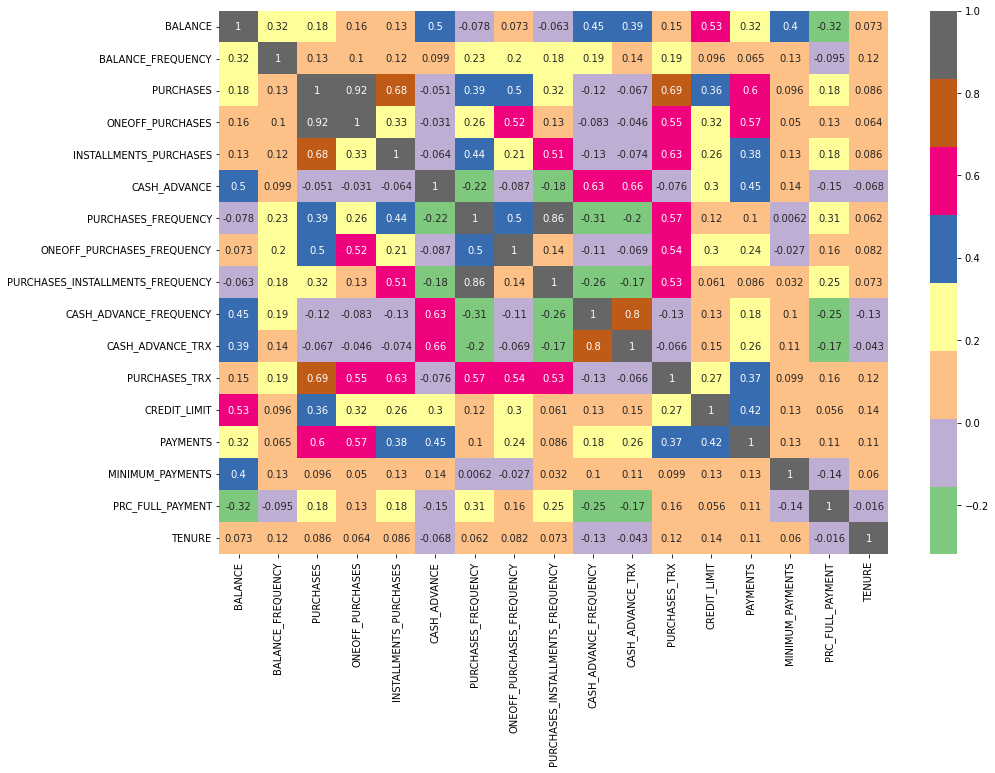

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='Accent')

Dari heatmap di atas, dapat dilihat bahwa:
1. Batas kredit berkorelasi positif dengan saldo, pembelian dan pembayaran. Ini berarti bahwa semakin tinggi batas kredit, semakin banyak saldo nosional, pembelian, dan pembayaran yang dilakukan pengguna.

2. Transaksi pembelian (PURCHASES) berkorelasi positif dengan pembelian transaksi tunggal (ONEOFF_PURCHASES) dan pembelian angsuran (INSTALLMENTS_PURCHASES). Dapat dipahami bahwa pengguna melakukan beberapa transaksi dalam satu waktu, dan juga dapat membayar dengan mencicil.

3. Saldo (BALANCE) berhubungan positif dengan uang muka (CASH_ADVANCE) (atau uang muka yang diberikan oleh pengguna) dan batas kredit (CREDIT_LIMIT). Artinya semakin besar jumlah kredit dan dana yang diberikan oleh pengguna, semakin banyak saldonya.



Visualisasi Distribusi Data Menggunakan Histogram

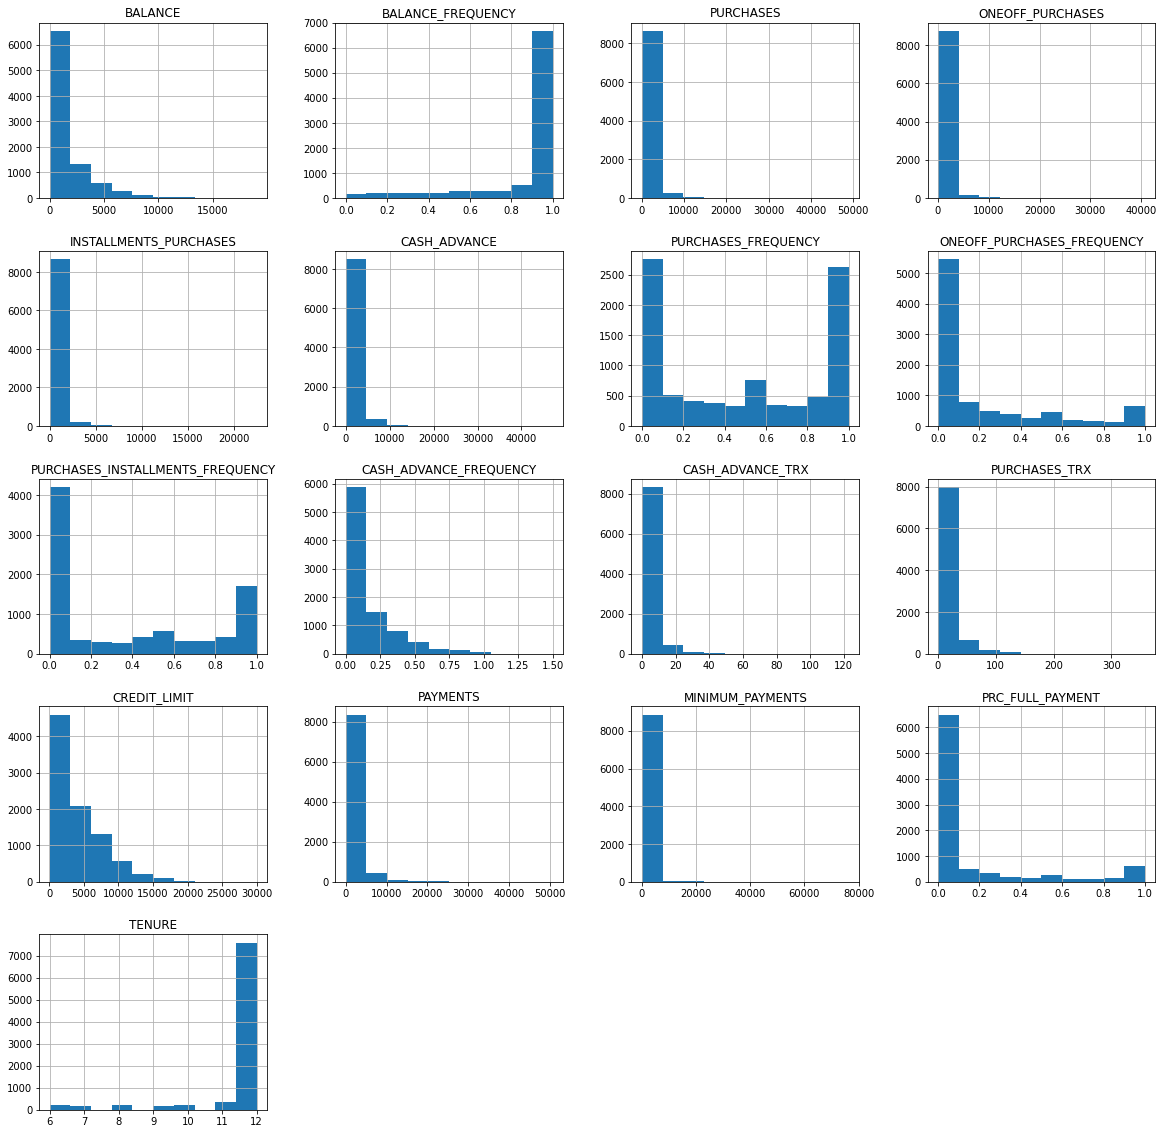

In [19]:
df.hist(figsize=(20,20))
plt.show()

Berdasarkan peta persebaran dan statistik deskriptif di atas, dapat diketahui bahwa selama 6 bulan penggunaan kartu kredit:
1. Sebagian besar pengguna kartu kredit menggunakan kartu kredit dengan nilai nominal kurang dari 5.000 untuk melakukan pembelian, dan rata-rata nilai nominal transaksi adalah sekitar 1.000. Selain itu, sebagian besar pengguna melakukan transaksi dengan denominasi tertinggi di bawah 1000. Sebagian besar pengguna juga membeli dengan mencicil. Gunakan kartu kredit dengan nilai nominal kurang dari 5000. Ini mungkin alasan saldo kecil, sehingga transaksi pembelian kecil mengikuti.

2. Saldo pengguna kartu kredit sebagian besar di bawah 2500, dan saldo rata-rata sekitar 1500. Juga, saldo pengguna kartu kredit sering diperbarui (dilambangkan dengan angka 1) yang paling sering, yang berarti bahwa pengguna kartu kredit sering memperbarui saldo. kartu kredit.

3. Pengguna kartu kredit tidak sering menggunakan kartu kreditnya untuk melakukan pembelian, baik dalam sekali transaksi maupun secara cicilan (ditunjukkan oleh grafik PURCHASE_FREQUENCY, ONEOFF_PURCHASE_FREQUENCY, dan PURCHASES_INSTALLMENTS FREQUENCY).

4. Sebagian besar pengguna memiliki kurang dari 5.000 kredit, dengan rata-rata 4.494 dan median 3.638.

5. Untuk menggunakan kartu kredit, sebagian besar pembeli harus membayar minimal $300 (berdasarkan nilai median kolom MINIMUM_PAYMENTS).

6. Pembeli juga membayar kurang dari nominal 5.000.

7. Pengguna memiliki periode penahanan kartu kredit, sebagian besar antara 10-12 bulan.

8. Sebagian besar pengguna kartu kredit telah membayar 20% dari jumlah pembayaran penuh.


Uji kemiringan menggunakan skewness

In [20]:
df.skew()

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522636
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.852446
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

# **F. Data Preprocessing**

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.


In [21]:
data = df.copy()

## **Standarisasi data**

Standardisasi adalah proses mengubah data sedemikian rupa sehingga mean tiap variabel menjadi sama dengan nol, dan standard deviation tiap variabel adalah satu. Dengan begitu, akan didapatkan skala yang sama untuk semua variabel. Standarisasi juga dilakukan karena banyaknya outlier atau pecilan pada data.

In [22]:
scaler = StandardScaler()
scaler.fit(data)
scaled_features = scaler.transform(data)

data_scaled = pd.DataFrame(scaled_features,columns = df.columns)
display(data_scaled)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.486217,-0.341250,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.503396,-0.228307,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960378,-0.570615,-0.326875,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097800,-0.580536,-0.338305,0.329200,-4.122768


## **Menentukan jumlah klaster optimal menggunakan metode Elbow**

Metode kurva Elbow digunakan untuk menentukan jumlah klaster optimal. Jika nilai klaster pertama dengan nilai cluster kedua memberikan sudut dalam grafik atau nilainya mengalami penurunan paling besar, maka klaster dua merupakan jumlah klaster yang optimal.

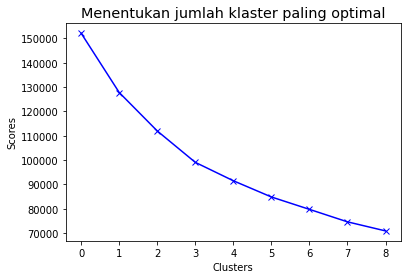

In [23]:
scores_1 = []

range_values = range(1,10)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_scaled)
    scores_1.append(kmeans.inertia_)
plt.plot(scores_1, 'bx-')
plt.style.use('ggplot')
plt.title('Menentukan jumlah klaster paling optimal')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

Berdasarkan plot di atas, dapat dilihat secara grafis bahwa klaster berjumlah 5 adalah yang paling optimal.

Berikut adalah kode penghitungan skor siluet untuk model clustering K-means yang dibuat dengan N = 5 (lima) cluster menggunakan dataset Sklearn IRIS.

In [74]:
# Calculate Silhoutte Score
score = silhouette_score(data_scaled, kmeans.labels_)
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.213


Jadi, didapatkan silhouette score sebesar 0,213.

In [69]:
display(df_clusters)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet.


# **G. Pendefinisian Model**

Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model. Akan lebih bagus jika didahului dengan penjelasan mengapa memilih
arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter, dan hal lain yang berkaitan.


In [24]:
df_model = data_scaled.copy()

In [25]:
df_model

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.486217,-0.341250,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.503396,-0.228307,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960378,-0.570615,-0.326875,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097800,-0.580536,-0.338305,0.329200,-4.122768


Mendefinisikan model kmeans dengan jumlah klaster sebanyak 3

In [64]:
model= KMeans(n_clusters=5, n_init=10, init= 'k-means++', algorithm='full', max_iter=300)

# **H. Pelatihan Model**

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

Memasukkan data scaled kedalam model K-means

In [65]:
model.fit(df_model)
labels= model.labels_

Melihat jumlah cluster dan kolom

In [66]:
print('Jumlah Cluster:', model.cluster_centers_.shape[0])
print('Jumlah Kolom:', model.cluster_centers_.shape[1])

Jumlah Cluster: 5
Jumlah Kolom: 17


# **I. Evaluasi Model**

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan
model. Jika memilih untuk melakukan model deployment, lanjut ke poin dibawah. Jika tidak, lanjut ke poin 5 dan 6.


Membuat kolom keterangan klaster pada dataframe

In [67]:
df_clusters = pd.concat([df, pd.DataFrame({'CLUSTER':labels})], axis=1)
display(df_clusters)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


Memvisualisasikan klaster yang terbentuk

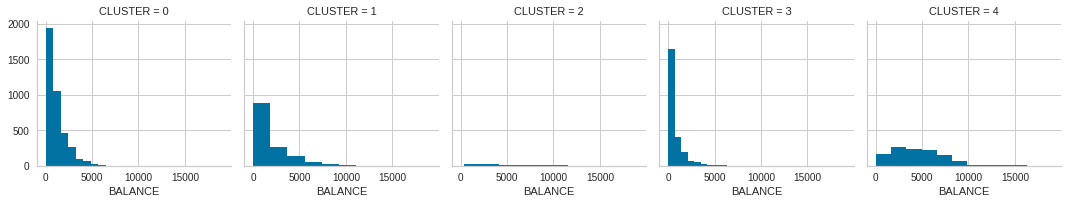

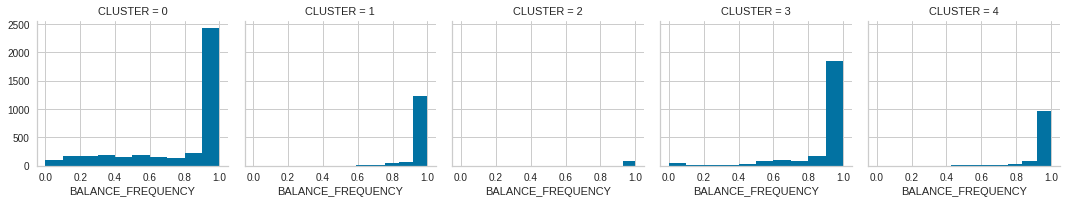

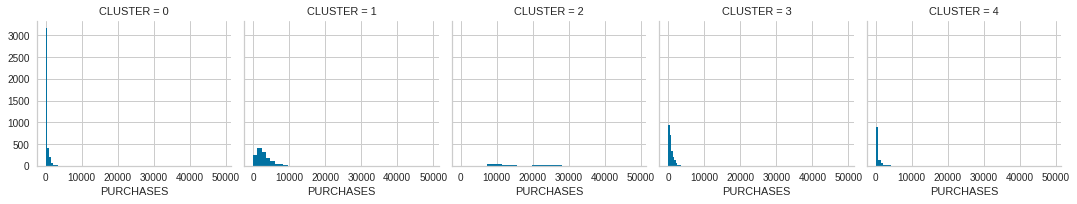

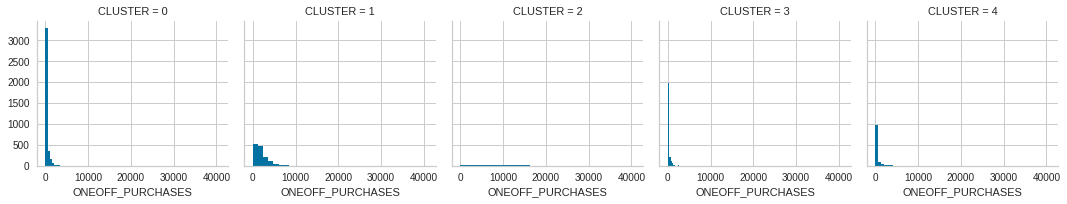

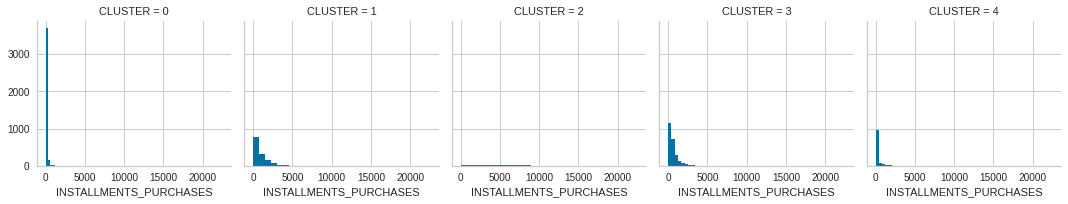

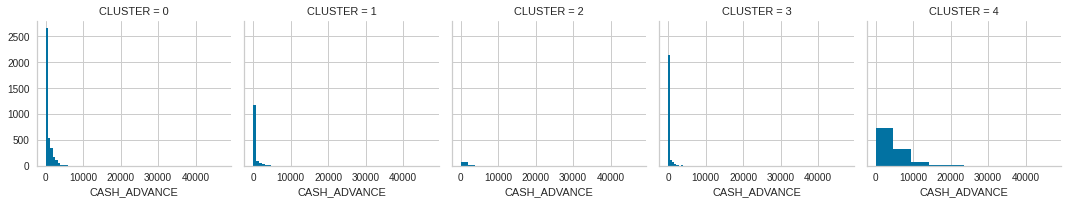

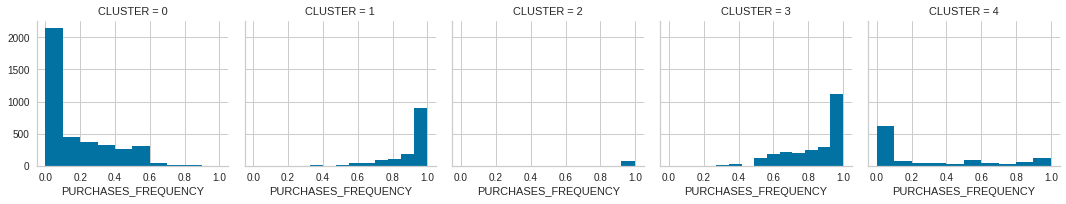

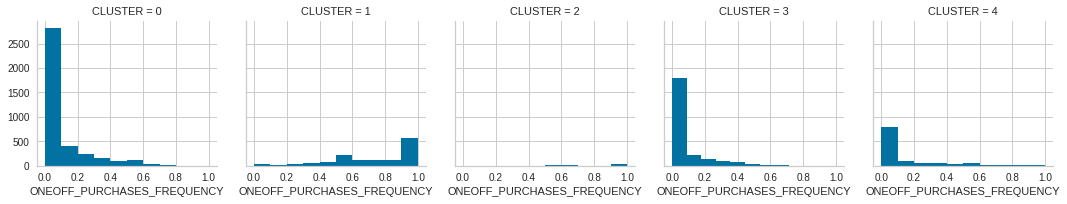

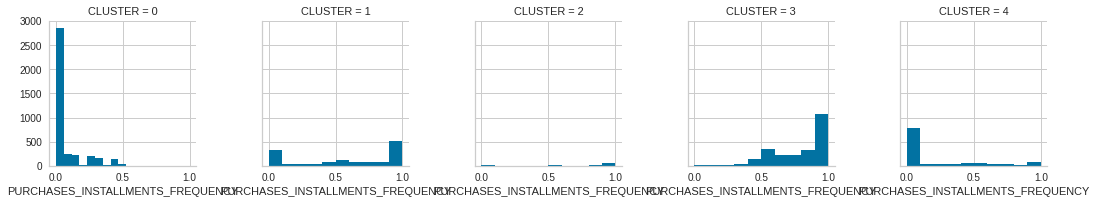

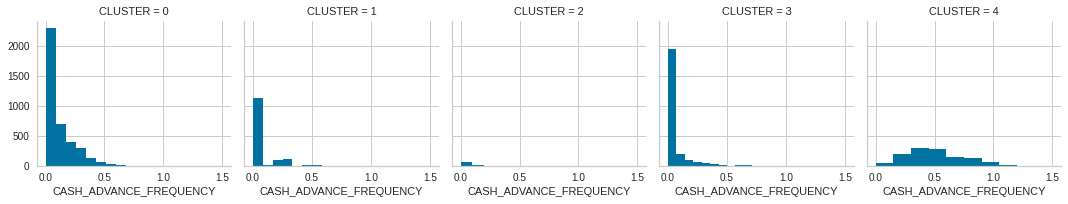

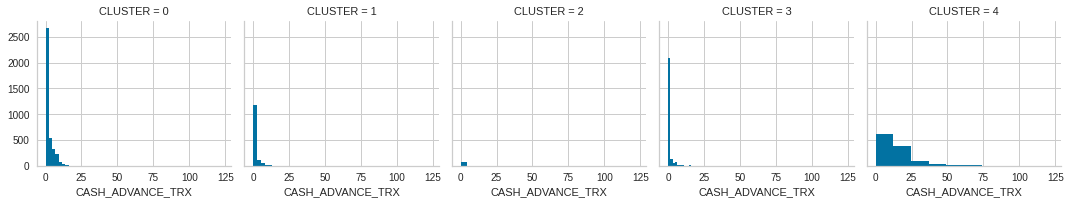

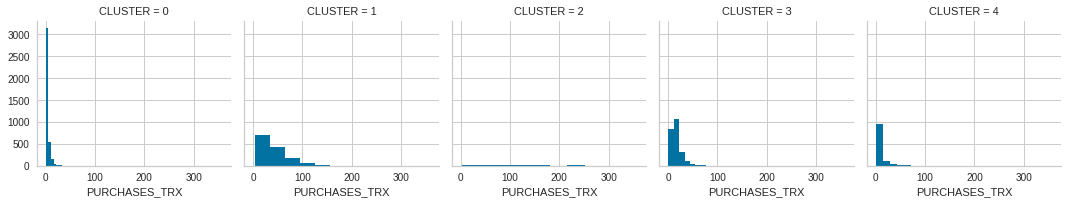

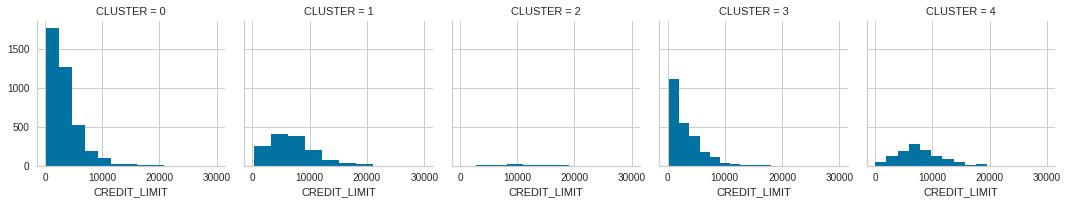

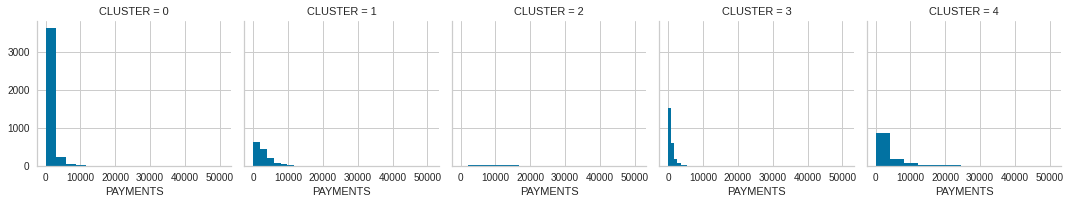

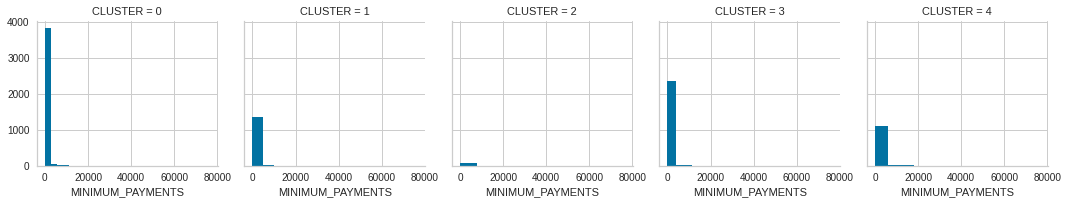

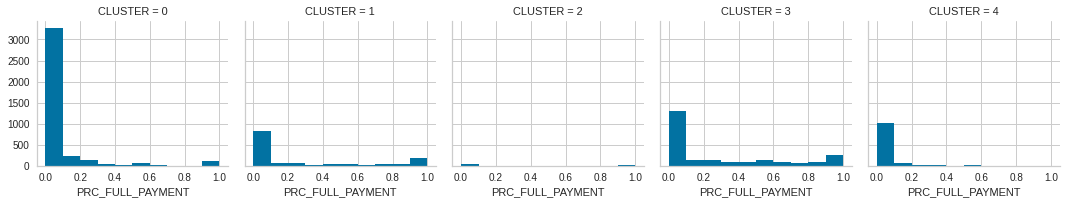

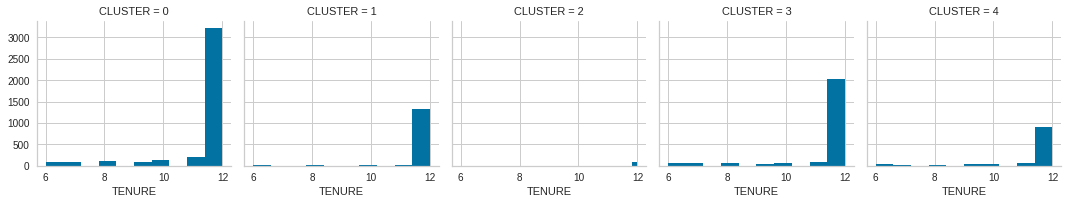

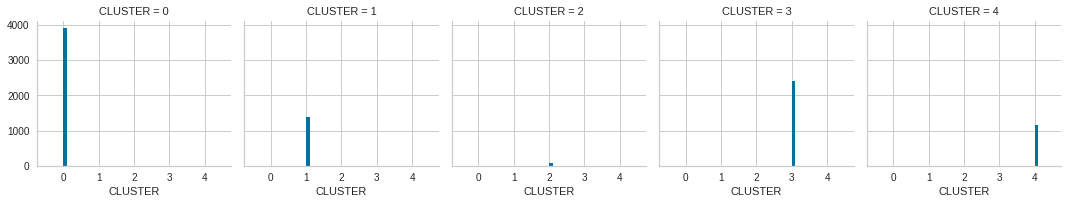

In [68]:
for c in df_clusters:
    grid= sns.FacetGrid(df_clusters, col='CLUSTER')
    grid.map(plt.hist, c)

Berdasarkan visualisasi cluster di atas, diketahui masing-masing cluster memeliki karakteristik yang berbeda , yakni:

- Cluster 0 

Kelompok Cluster 0 memiliki karakteristik yakni pengguna kartu kredit : 
1. Memiliki saldo di atas 1000 namun di bawah 1500.
2. Melakukan transaksi pembelian dan pembayaran dengan rata-rata nominal yang rendah. 
3. Limit kredit yang dimiliki di bawah 3500. 
4. Persentase pembayaran penuh sebesar 7%. 
5. Frekuensi transaksi dan tarik tunai yang dilakukan rendah. 
6. Pengguna kartu kredit paling banyak masuk ke dalam kelompok ini.



- Cluster 1 

Kelompok Cluster 1 memiliki karakteristik yakni pengguna kartu kredit :
1. Memiliki saldo dengan nominal rata-rata di atas 1500
2. Melakukan transaksi pembelian dan pembayaran dengan nominal rata-rata yang cukup tinggi (di atas 2000). 
3. Memiliki limit kredit sebesar 7000. 
4. Frekuensi transaksi pembelian dan pembayaran yang dilakukan cukup tinggi, namun frekuensi tarik tunai yang dilakukan rendah. 
5. Persentase pembayaran penuh sebesar 27%.



- Cluster 2 

Kelompok Cluster 2 memiliki karakteristik yakni pengguna kartu kredit :
1. Memiliki saldo dengan nominal rata-rata sekitar 4500. 
2. Melakukan transaksi pembayaran dan pembelian dengan nominal yang paling tinggi di antara klaster lain. 
3. Frekuensi transaksi pembayaran dan pembelian juga tinggi, namun transaksi tarik tunai yang dilakukan rendah. 
4. Memiliki rata-rata limit kredit tertinggi (di atas 10000). 
5. Persentase pembayaran penuh sebesar 39%.

- Cluster 3 

Kelompok Cluster 3 memiliki karakteristik yakni pengguna kartu kredit :
1. Memiliki saldo dengan jumlah yang paling tinggi di antara klaster lain (di atas 4500). 
2. Limit kredit yang dimiliki juga cukup tinggi yaitu di atas 7000. 
3. Frekuensi transaksi pembelian dan pembayaran yang dilakukan cukup rendah, namun frekuensi tarik tunai yang dilakukan cukup tinggi. 
4. Melakukan transaksi pembelian dengan nominal yang rendah, namun melakukan transaksi pembayaran dengan nominal yang cukup tinggi.

- Cluster 4 

Kelompok Cluster 4 memiliki karakteristik yakni pengguna kartu kredit :
1. Memiliki saldo kecil (di bawah 1000), namun melakukan transaksi pembelian dan pembayaran dengan rata-rata nominal yang cukup tinggi. 
2. Limit kredit yang dimiliki paling rendah dibanding klaster lain. 
3. Persentase pembayaran penuh sebesar 27% 
4. Frekuensi transaksi yang dilakukan cukup besar dan frekuensi tarik tunai yang kecil.

# **J. Model Inference**

- Skenario 1

Misal terdapat data pengguna kartu kredit sebagai berikut:

1. Balance : 1350
2. Balance Frequency : 0.70
3. Purchases Amount : 460
4. ONEOFF Purchases Amount : 460
5. Installment Purchases Amunt : 60
6. Cash Advance Amount : 110
7. Purchases Frequency : 0.5
8. ONEOFF Purchases Frequency : 0.5
9. Installment Purchases Frequency : 0.3
10. Cash Advance Frequency : 0.5
11. Number of cash advance transaction : 5
12. Number of purchases transaction : 10
13. Credit Limit Amount : 3500
14. Payment Amount : 1000
15. Minimum Payments Amount : 100
16. Percentage of Full Payments : 0.02
17. Tenure : 12

Pengguna ini akan termasuk dalam kelompok klaster berapa?

In [ ]:
balance = float(input('Balance:'))
balance_frq = float(input('Balance Frequency:'))
purchases = float(input('Purchases Amount:'))
oneoff_purchases = float(input('ONEOFF Purchases Amount:'))
installment_purchases = float(input('Installment Purchases Amount:'))
cash_advance = float(input('Cash Advance Amount:'))
purchases_frq = float(input('Purchases Frequency:'))
oneoff_purchases_frq = float(input('ONEOFF Purchases Frequency:'))
installment_purchases_frq = float(input('Installment Purchases Frequency:'))
cash_advance_frq = float(input('Cash Advance Frequency:'))
cash_advance_trx = float(input('Number of Cash Advance Transaction:'))
purchases_trx = float(input('Number of Purchases Transaction:'))
credit_limit = float(input('Credit Limit Amount:'))
payments = float(input('Payment Amount:'))
minimum_payments = float(input('Minimum Payments Amount:'))
prc_full_payments = float(input('Percentage of Full Payments:'))
tenure = float(input('Tenure:'))

val = [balance, balance_frq, purchases, oneoff_purchases, installment_purchases, 
       cash_advance, purchases_frq, oneoff_purchases_frq, installment_purchases_frq,
       cash_advance_frq, cash_advance_trx,
      purchases_trx, credit_limit, payments, minimum_payments, prc_full_payments, tenure]
val = scaler.transform([val])

print('Input values:', val)

val_predict = model.predict(val)

if val_predict == 0:
    print('Pengguna termasuk ke dalam klaster {}, dengan karakteristik\nPengguna dengan limit kredit rata-rata dan tidak banyak melakukan transaksi maupun tarik tunai kartu kredit'.format(val_predict))
elif val_predict == 1:
    print('Pengguna termasuk ke dalam klaster {}, dengan karakteristik\nPengguna dengan limit kredit tinggi dengan saldo rata-rata dan menggunakannya untuk transaksi pembelian dan pembayaran'.format(val_predict))
elif val_predict == 2:
    print('Pengguna termasuk ke dalam klaster {}, dengan karakteristik\nPengguna dengan limit kredit paling tinggi dan sering melakukan transaksi baik itu pembelian dan pembayaran ataupun tarik tunai'.format(val_predict))
elif val_predict == 3:
    print('Pengguna termasuk ke dalam klaster {}, dengan karakteristik\nPengguna dengan limit kredit tinggi dan menggunakannya untuk transaksi tarik tunai'.format(val_predict))
elif val_predict == 4:
    print('Pengguna termasuk ke dalam klaster {}, dengan karakteristik\nPengguna dengan limit kredit kecil dan melakukan transaksi pembayaran dan pembelian cukup sering'.format(val_predict))
else:
    print('Pengguna tidak termasuk dalam klaster manapun')

Balance:1350
Balance Frequency:0.70
Purchases Amount:460
ONEOFF Purchases Amount:460
Installment Purchases Amount:60
Cash Advance Amount:110
Purchases Frequency:0.5
ONEOFF Purchases Frequency:0.3
Installment Purchases Frequency:0.3
Cash Advance Frequency:0.5
Number of Cash Advance Transaction:5
Number of Purchases Transaction:10
Credit Limit Amount:3500
Payment Amount:1000
Minimum Payments Amount:100
Percentage of Full Payments:0.02
Tenure:12
Input values: [[-0.10304277 -0.74832264 -0.25424803 -0.07979139 -0.38822566 -0.41433083
   0.02404259  0.32697276 -0.16213688  1.8232743   0.25660977 -0.18948274
  -0.27327139 -0.25325343 -0.31933764 -0.45717089  0.36067954]]
Pengguna termasuk ke dalam klaster [0], dengan karakteristik
Pengguna dengan limit kredit rata-rata dan tidak banyak melakukan transaksi maupun tarik tunai kartu kredit


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


- Skenario 2

Misal terdapat data pengguna kartu kredit sebagai berikut:

1. Balance:3000
2. Balance Frequency:0.82
3. Purchases Amount:800
4. ONEOFF Purchases Amount:800
5. Installment Purchases Amount:250
6. Cash Advance Amount:500
7. Purchases Frequency:0.8
8. ONEOFF Purchases Frequency:0.8
9. Installment Purchases Frequency:0.7
10. Cash Advance Frequency:0.6
11. Number of Cash Advance Transaction:24
12. Number of Purchases Transaction:36
13. Credit Limit Amount:6400
14. Payment Amount:3100
15. Minimum Payments Amount:500
16. Percentage of Full Payments:0.38
17. Tenure:12

Pengguna ini akan termasuk dalam kelompok klaster berapa?

In [ ]:
balance = float(input('Balance:'))
balance_frq = float(input('Balance Frequency:'))
purchases = float(input('Purchases Amount:'))
oneoff_purchases = float(input('ONEOFF Purchases Amount:'))
installment_purchases = float(input('Installment Purchases Amount:'))
cash_advance = float(input('Cash Advance Amount:'))
purchases_frq = float(input('Purchases Frequency:'))
oneoff_purchases_frq = float(input('ONEOFF Purchases Frequency:'))
installment_purchases_frq = float(input('Installment Purchases Frequency:'))
cash_advance_frq = float(input('Cash Advance Frequency:'))
cash_advance_trx = float(input('Number of Cash Advance Transaction:'))
purchases_trx = float(input('Number of Purchases Transaction:'))
credit_limit = float(input('Credit Limit Amount:'))
payments = float(input('Payment Amount:'))
minimum_payments = float(input('Minimum Payments Amount:'))
prc_full_payments = float(input('Percentage of Full Payments:'))
tenure = float(input('Tenure:'))

val = [balance, balance_frq, purchases, oneoff_purchases, installment_purchases, 
       cash_advance, purchases_frq, oneoff_purchases_frq, installment_purchases_frq,
       cash_advance_frq, cash_advance_trx,
      purchases_trx, credit_limit, payments, minimum_payments, prc_full_payments, tenure]
val = scaler.transform([val])

print('Input values:', val)

val_predict = model.predict(val)

if val_predict == 0:
    print('Pengguna termasuk ke dalam klaster {}, dengan karakteristik\nPengguna dengan limit kredit rata-rata dan tidak banyak melakukan transaksi maupun tarik tunai kartu kredit'.format(val_predict))
elif val_predict == 1:
    print('Pengguna termasuk ke dalam klaster {}, dengan karakteristik\nPengguna dengan limit kredit tinggi dengan saldo rata-rata dan menggunakannya untuk transaksi pembelian dan pembayaran'.format(val_predict))
elif val_predict == 2:
    print('Pengguna termasuk ke dalam klaster {}, dengan karakteristik\nPengguna dengan limit kredit paling tinggi dan sering melakukan transaksi baik itu pembelian dan pembayaran ataupun tarik tunai'.format(val_predict))
elif val_predict == 3:
    print('Pengguna termasuk ke dalam klaster {}, dengan karakteristik\nPengguna dengan limit kredit tinggi dan menggunakannya untuk transaksi tarik tunai'.format(val_predict))
elif val_predict == 4:
    print('Pengguna termasuk ke dalam klaster {}, dengan karakteristik\nPengguna dengan limit kredit kecil dan melakukan transaksi pembayaran dan pembelian cukup sering'.format(val_predict))
else:
    print('Pengguna tidak termasuk dalam klaster manapun')

Balance:3000
Balance Frequency:0.82
Purchases Amount:800
ONEOFF Purchases Amount:800
Installment Purchases Amount:250
Cash Advance Amount:500
Purchases Frequency:0.8
ONEOFF Purchases Frequency:0.8
Installment Purchases Frequency:0.7
Cash Advance Frequency:0.6
Number of Cash Advance Transaction:24
Number of Purchases Transaction:36
Credit Limit Amount:6400
Payment Amount:3100
Minimum Payments Amount:500
Percentage of Full Payments:0.38
Tenure:12
Input values: [[ 0.68968695 -0.24176006 -0.0951104   0.12505316 -0.17811551 -0.228355
   0.77152297  2.0030287   0.84434088  2.32299893  3.0407922   0.8565314
   0.52377275  0.47215973 -0.14785973  0.77367048  0.36067954]]
Pengguna termasuk ke dalam klaster [3], dengan karakteristik
Pengguna dengan limit kredit tinggi dan menggunakannya untuk transaksi tarik tunai


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


# **K.Pengambilan Kesimpulan**

Pada bab terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan dibandingkan dengan objective yang sudah ditulis di bagian pengenalan

- Menggunakan K-means Clustering , kami dapat membangun sebuah model yang dapat mengelompokkan dataset general CC kedalam 5 klaster dengan silhouette score sebesar 0,489 dengan karakteristik yang berbeda-beda setiap clusternya. 